## WELCOME TO COSMIC



***What is COSMIC, and what can I use it for?***

[COSMIC](https://cosmic-popsynth.github.io/docs/stable/index.html) (Compact Object Synthesis and Monte Carlo Investigation Code) is a rapid binary population synthesis code. This means that it models the evolution of binaries with given properties. You can use COSMIC to generate synthetic populations of binaries and study their properties once they evolve. 



# **Installing COSMIC**


First, you need to install cosmic. For this turorial, we will just pip install it in this jupyter notebook. If after this tutorial you decide to use COSMIC, feel free to install it inn your computer following the installation instructions [here](https://cosmic-popsynth.github.io/docs/stable/install/index.html#).

In [2]:
! pip install cosmic-popsynth # installing COSMIC in jupyter notebook
pip install numpy --upgrade --ignore-installed

# How to generate a  COSMIC binary

Let's import cosmic and all of its pertaining modules. Cosmic has built-in functions that we want to use, which are imported in the cell below. The `InitialBinaryTable` function is used to generate a table of the initial parameters of your binary. 

 



In [3]:
# pip install numpy --upgrade --ignore-installed #you may have the wrong version of numpy
import cosmic
import cosmic.sample.initialbinarytable
from cosmic.sample.initialbinarytable import InitialBinaryTable

To test that is working perfectly, the following cell initiates a binary with random properties(mass, separation, stellar type, etc).


In [4]:
single_binary = InitialBinaryTable.InitialBinaries(m1=85.543645, m2=84.99784, porb=446.795757, ecc=0.448872, tphysf=13700.0, kstar1=1, kstar2=1, metallicity=0.002)

print(single_binary) #this will print the properties of the binary
print(single_binary.columns) #this will print the header of the table


   kstar_1  kstar_2     mass_1    mass_2        porb       ecc  metallicity  \
0      1.0      1.0  85.543645  84.99784  446.795757  0.448872        0.002   

    tphysf    mass0_1   mass0_2  ...  tacc_1  tacc_2  epoch_1  epoch_2  tms_1  \
0  13700.0  85.543645  84.99784  ...     0.0     0.0      0.0      0.0    0.0   

   tms_2  bhspin_1  bhspin_2  tphys  binfrac  
0    0.0       0.0       0.0    0.0      1.0  

[1 rows x 38 columns]
Index(['kstar_1', 'kstar_2', 'mass_1', 'mass_2', 'porb', 'ecc', 'metallicity',
       'tphysf', 'mass0_1', 'mass0_2', 'rad_1', 'rad_2', 'lum_1', 'lum_2',
       'massc_1', 'massc_2', 'radc_1', 'radc_2', 'menv_1', 'menv_2', 'renv_1',
       'renv_2', 'omega_spin_1', 'omega_spin_2', 'B_1', 'B_2', 'bacc_1',
       'bacc_2', 'tacc_1', 'tacc_2', 'epoch_1', 'epoch_2', 'tms_1', 'tms_2',
       'bhspin_1', 'bhspin_2', 'tphys', 'binfrac'],
      dtype='object')


The most relevant properties for this tutorial are listed below. If you are interested in the other parameters, please check them out [here](https://cosmic-popsynth.github.io/docs/stable/output_info/index.html#evolutionary-states-of-stars-binaries)

*   *Kstar:*       Evolutionary stage of the star
*   *Mass:*        Initial mass of the star ($M_{\odot}$)
*   *Porb:*        Initial orbital period (days)
*   *Ecc:*         Initial eccentricity
*   *Metallicity:* Metallicity of the population ($Z_{\odot}$)
*   *Tphysf:*      Total evolution time (Myr)
*   *Sep:*         Semimajor axis ($R_{\odot}$)

# **How to evolving binaries with COSMIC**

Now that you know how to create the initial conditions for binaries, you can try to evolve them over time and see what they do! To do this, we will need to use a built-in COSMIC function called `Evolve`. You will also need to specify parameters for binary evolution, stored in the dictionary `BSEDict`. The `Evolve` function has four different outputs: 

*   *bpp :* pandas.DataFrame, tracks a selection of binary parameters at key evolutionary changes.
*   *bcm :* This pandas.DataFrame provides several binary parameters at user-specified timesteps in the evolution (you will not use this).
*   *initC :* this is just single_binary.
*   *kick_info:* a (2,17) array that tracks information about supernova kicks.



In [4]:
import cosmic
from cosmic.evolve import Evolve

In [5]:
#setting evolutionary parameters
BSEDict = {'xi': 1.0, 'bhflag': 1, 'neta': 0.5, 'windflag': 3, 'wdflag': 1, 'alpha1': 1.0, 'pts1': 0.001, 'pts3': 0.02, 'pts2': 0.01, 'epsnov': 0.001, 'hewind': 0.5, 'ck': 1000, 'bwind': 0.0, 'lambdaf': 0.0, 'mxns': 3.0, 'beta': -1.0, 'tflag': 1, 'acc2': 1.5, 'grflag' : 1, 'remnantflag': 4, 'ceflag': 0, 'eddfac': 1.0, 'ifflag': 0, 'bconst': 3000, 'sigma': 265.0, 'gamma': -2.0, 'pisn': 45.0, 'natal_kick_array' : [[-100.0,-100.0,-100.0,-100.0,0.0], [-100.0,-100.0,-100.0,-100.0,0.0]], 'bhsigmafrac' : 1.0, 'polar_kick_angle' : 90, 'qcrit_array' : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0], 'cekickflag' : 2, 'cehestarflag' : 0, 'cemergeflag' : 0, 'ecsn' : 2.25, 'ecsn_mlow' : 1.6, 'aic' : 1, 'ussn' : 0, 'sigmadiv' :-20.0, 'qcflag' : 1, 'eddlimflag' : 0, 'fprimc_array' : [2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0], 'bhspinflag' : 0, 'bhspinmag' : 0.0, 'rejuv_fac' : 1.0, 'rejuvflag' : 0, 'htpmb' : 1, 'ST_cr' : 1, 'ST_tide' : 1, 'bdecayfac' : 1, 'rembar_massloss' : 0.5, 'kickflag' : 0, 'zsun' : 0.014, 'bhms_coll_flag' : 0, 'don_lim' : -1, 'acc_lim' : -1}

#evolving the binary
bpp, bcm, initC, kick_info = Evolve.evolve(initialbinarytable=single_binary,pool=None,BSEDict=BSEDict)

#printing the columns of the bpp table
print(bpp.columns)

#printing a specific value 
print(bpp.mass_1) 

/Users/elenagonzalez/anaconda3/lib/python3.7/site-packages/cosmic/utils.py:965: UserWarning: 'zsun' is set to a different value than assumed in the mlwind prescriptions (you set it to '0.014' and in mlwind, zsun_wind=0.019)
  f"'{flag:s}' is set to a different value than assumed in the mlwind "


Index(['tphys', 'mass_1', 'mass_2', 'kstar_1', 'kstar_2', 'sep', 'porb', 'ecc',
       'RRLO_1', 'RRLO_2', 'evol_type', 'aj_1', 'aj_2', 'tms_1', 'tms_2',
       'massc_1', 'massc_2', 'rad_1', 'rad_2', 'mass0_1', 'mass0_2', 'lum_1',
       'lum_2', 'teff_1', 'teff_2', 'radc_1', 'radc_2', 'menv_1', 'menv_2',
       'renv_1', 'renv_2', 'omega_spin_1', 'omega_spin_2', 'B_1', 'B_2',
       'bacc_1', 'bacc_2', 'tacc_1', 'tacc_2', 'epoch_1', 'epoch_2',
       'bhspin_1', 'bhspin_2', 'bin_num'],
      dtype='object')
0    85.543645
0    77.800488
0    77.678377
0    77.005990
0    35.408051
0    35.217578
0    29.006705
0    28.506705
0    28.506716
0    28.507923
0    28.509163
0    28.509163
0    28.509163
0    28.509163
0    28.509172
0    28.509172
0    28.509172
Name: mass_1, dtype: float64


# **Saving COSMIC Output to csv Files**

We don't want to have to constantly run COSMIC, so let's save the simulation output! We are only going to need *bpp*, which is a pandas data frame. Save it to a csv file using [pd.DataFrame.to_csv](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html). 



In [6]:
import pandas as pd
import csv

#creating data frame
df=pd.DataFrame(bpp)

#saving dataframe to csv file
df.to_csv('data.csv') 

Try opening the file and accessing the data, saving some quatities into different arrays like mass1, mass2, etc. 



In [7]:
#read-in files
data_file = open('data.csv')
data=pd.read_csv(data_file)

#print the data
print(data)

#split data into arrays
time =  data['tphys']
mass1 = data['mass_1']
mass2 = data['mass_2']
rad1  = data['rad_1']
rad2  = data['rad_2']
porb =  data['porb']
sep =   data['sep']
kstar1= data['kstar_1']
kstar2= data['kstar_2']
lum1=   data['lum_1']
lum2=   data['lum_2']
teff1=  data['teff_1']
teff2=  data['teff_2']


    Unnamed: 0         tphys     mass_1      mass_2  kstar_1  kstar_2  \
0            0      0.000000  85.543645   84.997840      1.0      1.0   
1            0      3.684610  77.800488   77.381551      2.0      1.0   
2            0      3.685755  77.678377   77.385347      2.0      1.0   
3            0      3.687375  77.005990   77.861499      4.0      1.0   
4            0      3.705707  35.408051  117.801539      4.0      1.0   
5            0      3.706977  35.217578  117.857094      7.0      1.0   
6            0      4.019729  29.006705  115.513050      7.0      1.0   
7            0      4.019729  28.506705  115.513050     14.0      1.0   
8            0      4.838291  28.506716   88.892589     14.0      2.0   
9            0      4.839772  28.507923   88.694328     14.0      2.0   
10           0      4.840763  28.509163   88.466422     14.0      4.0   
11           0      4.840763  28.509163   88.466422     14.0      4.0   
12           0      4.840763  28.509163   41.985973

## Example 1: Mass Over Time

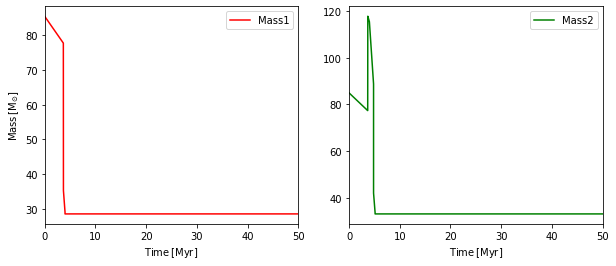

In [8]:
import matplotlib.pyplot as plt 
%matplotlib inline

fig, (ax1,ax2) = plt.subplots(1,2, figsize  = (10,4))

ax1.plot(time,mass1, color = 'red', label = 'Mass1')
ax2.plot(time,mass2, color = 'green', label = 'Mass2')
ax1.set_ylabel(r'$\rm Mass  \, [M_{\odot}]$')
ax1.set_xlabel(r'$\rm Time \, [Myr]$')
ax2.set_xlabel(r'$\rm Time \, [Myr]$')
ax1.legend()
ax2.legend()
ax1.set_xlim(0,50)
ax2.set_xlim(0,50)
plt.show()

## Example 2. Star Radius Over Time

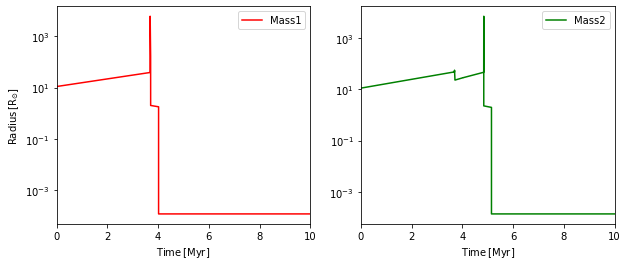

In [9]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize  = (10,4))

ax1.plot(time,rad1, color = 'red', label = 'Mass1')
ax2.plot(time,rad2, color = 'green', label = 'Mass2')
ax1.set_ylabel(r'$\rm Radius  \, [R_{\odot}]$')
ax1.set_xlabel(r'$\rm Time \, [Myr]$')
ax2.set_xlabel(r'$\rm Time \, [Myr]$')
ax1.legend()
ax2.legend()
ax1.set_xlim(0,10)
ax2.set_xlim(0,10)
ax1.set_yscale('log')
ax2.set_yscale('log')
plt.show()

## Example 3: Orbital Period Over Time

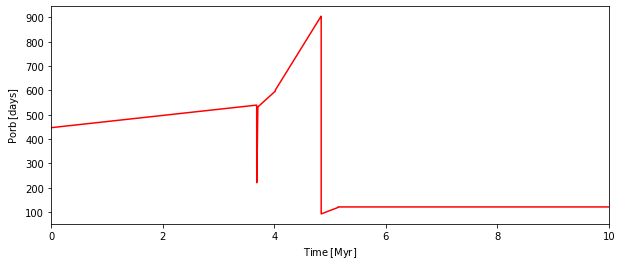

In [10]:
plt.figure(figsize  = (10,4))

plt.plot(time,porb, color = 'red')

plt.ylabel(r'$\rm Porb  \, [days]$')
plt.xlabel(r'$\rm Time \, [Myr]$')
plt.xlim(0,10)
plt.show()


## Example 4: Binary Separation Over Time. 

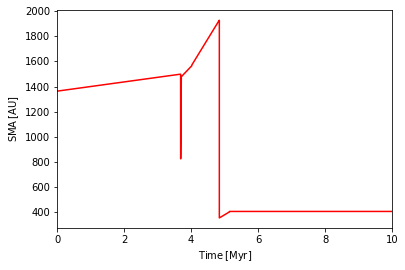

In [11]:
plt.plot(time,sep, color = 'red')

plt.ylabel(r'$\rm SMA \, [AU] $')
plt.xlabel(r'$\rm Time \, [Myr]$')
plt.xlim(0,10)
plt.show()

# **Example 4: Calculating the Roche Lobe Radius**


WOW! You are at the end of the first section of your project! Congrats 🥳 

The aim of today is to understand a bit more about the evolution of binaries. In astronomy, we have defined a radius called the Roche Lobe Radius. This defined the region around a star within which any material is bound to that star. So, if a star in a binary grows to a distance larger than its Roche Lobe Radius during the red giant phase (because the star expands), then some of its material will be "accretted' by its companion! Pretty cool, right?  

You can read more about this [here](https://en.wikipedia.org/wiki/Roche_lobe). Now, using the definiton shown in the image below, write your own function that will calculate the roche radius for a binary with given parameters.




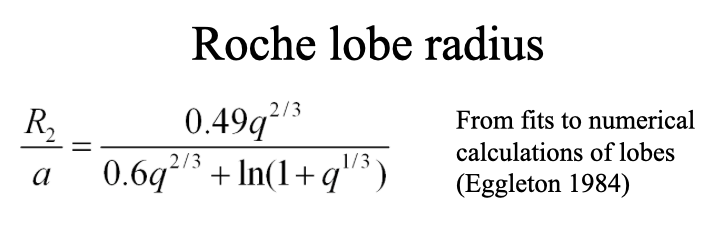

Now, before you begin, it is very important to be organized when writing a function. As you write your own code, you will find that you will start to forget what a function was initially for, or what input it needs. Furthermore, if you share your code with anyone, it is important that they are able to understand what you wrote. For that reason, at the start of any function, people usually write a short description of what it is for, a list of input parameters with their type (string, float, integer ...) as well as the output. It is great to get in the habit of doing this! You can see an example of it if you run `help(Evolve)` (or any function you want). 

In [12]:
def r_roche(sep,mass1,mass2):

    '''This function will return the Roche lobe radius at a specific time, utlizing 
    the semi-major axis and stellar masses at that time. This can be used to compare
    the Roche lobe radius to the actual radius of a star at a specific time. 
    If the Roche lobe radius calculated at that time is smaller than the radius of 
    the star at the point,the star has filled/overfilled its Roche lobe.

        Parameters:

          m1: the mass of the first star (solar masses)
          m2: the mass of the second star (solar masses)
          a: the semimajor axis

    '''
    mass1 = np.array(mass1)
    mass2 = np.array(mass2)
    a = np.array(sep)
    
    q = np.array([mass1/mass2])

    R = [((0.49*(q**(2/3))))/((0.6*(q**(2/3)))+np.log(1+(q**(1/3))))*a]

    return R


In [13]:
#Running the function:
Roche=r_roche(sep,mass1,mass2)

#Overplotting the Roche Radius

fig, (ax1,ax2) =plt.subplots(2)

ax1.plot(time,rad1,color='red')
ax1.plot(time,Roche[-1][0], color='black',linestyle='--')
ax1.set_xlabel('Time [Myr]')
ax1.set_ylabel('Radius [Solar radii]')
ax1.set_xlim([0,5])
ax1.set_yscale('log')
ax1.legend(['Mass 1'],loc='upper left')

#------------------------------------------
ax2.plot(time,rad2,color='green')

ax2.plot(time,Roche[-1][0],color='black',linestyle='--')
ax2.set_xlabel('Time [Myr]')
ax2.set_ylabel('Radius [Solar radii]')
ax2.set_xlim([0,5])
ax2.set_yscale('log')
ax2.legend(['Mass 2'],loc='upper left')


NameError: name 'np' is not defined